Schrödinger's Equation - Infinite Well
=====
# Barry O'Donnell

## 7/11/2019

In this assignment, I will be using a numerical method of solving differential equations of order 2. 

The differential equation in this case is 'Schrödinger's Equation' (*SE*) and my numerical method is the Runge-Kutta of the 4th-order (RK4).

Schrödinger's Equation can be reduced down to a position-dependent-wavefunction which is what we are working with. The formula is;
### $$ \frac{d^2\phi(x)}{dx^2} = -\frac{2m}{\hbar^2} [E-V(x)] \phi(x) $$
This can be simplified further, considering we are working with a box of size 1nm, we can write this equation as;
### $$ \frac{d^2\phi(x)}{dx^2} = -26.2 [E-V(x)] \phi(x) $$

Where:
- $\phi$ is the time-independent wavefunction of *SE*,
- $E$ is the energy of the particle,
- $V(x)$ is the potential at position '$x$'.

### Task 1
- I will need to define the Runge-Kutta method
- I will calculate the wavefunction of a particle in the GROUND STATE (Even)
- I will plot the wavefunction of the particle, as well as the probability distribution of the particle

### Task 2
- Similar to 'Task 1', except this time I will calculate the 'Odd' solution of the wavefunction
- Once the 'Odd' solution is found, I will attempt to find the other states by increasing the energy with respect to some constant squared.
- I will again plot the wavefunction of each state and their respective probability distribution

----

## Task 1
I will begin by defining some functions that will be needed later on in the assignment

'RK4' is the following algorithm;

1. We begin with our formula


#### $$ \ddot{x} + a\dot{x} + bx = f(t)$$


 - Where 'x' is a function of time in this case.
2. We can shorten this down if we consider that $\nu$ is the time derivative of '$x$', we get, $\nu = \dot{x}$. With this we get


#### $$ \dot{\nu} + a\nu + bx = f(t) $$


 - Using this fact we can numerically calculate '$\dot{\nu}$', '$\nu$', and '$x$' using the Runge-Kutta method for a second order equation. Since we are we can numerically calculate '$\dot{\nu}$' using the formula provided above, and I'll refer to this as $F(t,x,\nu)$ from now on ($\dot{\nu} = F(t,x,\nu))$
3. To start, we need to calculate the 'change in '$x$'' with respect to '$\nu$' over a small step of 'time', ie.


#### $$ dx \equiv h\nu $$


 - Where:
  - '$h$' is the change in 'time' with each 'step'
4. Similarly we need to calculate the 'change in '$\nu$'' with respect to '$\dot{\nu}$' over a small step of 'time'


#### $$ d\nu \equiv h\dot{\nu} = hF(t,x,v) $$

Here, RK4 comes into full effect, taking multiple steps to calculate a single '$dx$' and '$d\nu$' and ultimately a small step for '$x$'

5. Calculating RK4 follows this algorithm.


#### $ dx_1 \equiv h\nu \qquad \qquad \;\;\; d\nu_1 \equiv hF(t,x,\nu) $
#### $ dx_2 \equiv h(\nu + \frac{d\nu_1}{2}) \qquad d\nu_2 \equiv hF(t+\frac{h}{2}, x+\frac{dx_1}{2}, \nu+\frac{d\nu_1}{2}) $
#### $ dx_3 \equiv h(\nu + \frac{d\nu_2}{2}) \qquad d\nu_3 \equiv hF(t+\frac{h}{2}, x+\frac{dx_2}{2}, \nu+\frac{d\nu_2}{2}) $
#### $ dx_4 \equiv h(\nu + d\nu_3) \qquad d\nu_4 \equiv hF(t + h,x + dx_3,\nu + d\nu_3) $

 - Bringing it all together, we get;
 
 
### $ dx = \frac{dx_1 + 2dx_2 + 2dx_3 + dx_4}{6} \qquad d\nu = \frac{d\nu_1 +2d\nu_2 +2d\nu_3 + d\nu_4}{6} $
### $ x(t+h) = x(t) + dx \qquad \nu(t+h) = \nu(t) + d\nu$

6. Repeat the process until you reach the '$t$' value you need.

To translate this to Schrödinger's Equation, we need to find the equivalent forms. To put it short, these are;
### $$ t \rightarrow x $$
### $$ x(t) \rightarrow \phi(x) $$
### $$ \dot{\nu} = F(t,x,v) \rightarrow \frac{d^2\phi(x)}{dx^2} = F(x, \phi)$$
### $$ h (=dt) \rightarrow dx$$
This quickly becomes confusing, as we do not depend on '$\nu$' when working with *SE*, as it does not appear in the formula.

We are also not dependent on 'time', but instead on 'position'. '$h$' here is now the change in position.
Pulling all this information together, we can eventually get a function we can work with to numerically calculate SE in some position '$x$'!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Defining the above formula
##  This will be used in the Runge-Kutta method for calculating 'phi'
def d2_phi(x, phi, L=1, E=0.09, V=100000, harmonic=False, k=0):
    """ 
    Calculates the second-derivative of the wavefunction 'phi'.

    Returns: Float / Array of floats

    Args;
        'x'   :- Float / Array of floats representing position in Well
        'phi' :- Float / Array of floats repr. wavefunction 'y' values
        'L'   :- Float, repr. Well width
        'E'   :- Float, repr. particle's energy (in eV)
        'V'   :- Float, repr. Potential outside of well walls
        
    """
    ## Checks if currently calculating inside well
    ##  Inside well, V = 0
    if harmonic is False:
        if abs(x) < L:
            return (-26.2 * (E) * phi)
        else:
            return (-26.2 * (E - V) * phi)
    
    else:
        k = 12.2
        V = (k * x**2) / 2
        
        if abs(x) < L:
            return (-26.2 * (E) * phi)
        else:
            return (-26.2 * (E - V) * phi)
        
        
        
## Defining Runge-Kutta of the fourth order
##  The formula I am following is from 
##    -- https://i.stack.imgur.com/B8ePj.png --
##  This specific RK4 is specialised for the wavefunction
##  This is apparent when calculating 'dv' as 'v' in this situation is not
##   called upon, as 'dv' is not dependent on 'v'
def RungeKutta_fourth(start=0, end=1, steps=10, L=1, E=0.04, V=100000, state=1, harmonic=False, k=0):
    """
    Numerically solves the wavefunction 'phi'.
    
    Returns: Array of Floats (Position), Array of Floats (Phi)
    
    Args;
        'start'  :- Float, repr. the starting position of our calculation
        'end'    :- Float, repr. the end postion of our calculation
        'steps'  :- int., repr. the amount of steps needed to go from 'start' to 'end'
        'L'      :- Float, repr. Well width
        'E'      :- Float, repr. particle's energy (in eV)
        'V'      :- Float, repr. Potential outside of well walls
        'state'  :- int., check for
        
    """
    ## Defines 2 arrays
    ##  Here, 'x' represents 'phi' from out original equation
    ##   and 'v' represents the first derivative of 'phi' with respect to 'x'
    x = np.zeros(steps)
    v = np.zeros(steps)
    
    ## Checks if the state of the particle is even or odd for initial values
    ##  I found that the 'v' of ODD functions depended heavily on the actual state of the particle
    ##  If the 'v' was left as '1' for each state, the max peak of each wavefunction slowly got smaller and
    ##  smaller for each increasing state
    if (state % 2) != 0:
        x[0], v[0] = 1, 0
    else:
        x[0], v[0] = 0, 1.6 * state
    ## Getting an array of 'steps' in length of evenly spaced seperations between
    ##  'start' and 'end'
    t = np.linspace(start, end, num=steps)
    
    ## Calculating the 'step size' 'h'
    h = t[1] - t[0]
    
    ## Begin for loop to calculate the wavefunction 'x' ('phi')
    for i in range(steps-1): 
        dx_1 = h * v[i]
        dv_1 = h * d2_phi(t[i], x[i], L=L, E=E, V=V, harmonic=harmonic, k=k)
        
        dx_2 = h * (v[i] + dv_1/2)
        dv_2 = h * d2_phi(t[i] + h/2, x[i] + dx_1/2, L=L, E=E, V=V, harmonic=harmonic, k=k)
        
        dx_3 = h * (v[i] + dv_2/2)
        dv_3 = h * d2_phi(t[i] + h/2, x[i] + dx_2/2, L=L, E=E, V=V, harmonic=harmonic, k=k)
        
        dx_4 = h * (v[i] + dv_3)
        dv_4 = h * d2_phi(t[i] + h, x[i] + dx_3, L=L, E=E, V=V, harmonic=harmonic, k=k)
                    
        dx_tot = (dx_1 + 2*dx_2 + 2*dx_3 + dx_4) / 6
        dv_tot = (dv_1 + 2*dv_2 + 2*dv_3 + dv_4) / 6
        
        x[i+1] = x[i] + dx_tot
        v[i+1] = v[i] + dv_tot
        
    ## Return t, x for user to plot later
    return t, x



In [3]:
## Defining a function to easily plot the outputs of the Runge-Kutta method
def WellPlot(x, phi, L=1, state=1, E=1):
    """
    Produces plots for wavefunctions in wells
    
    Returns: 2 Plots;
                A wavefunction plot
                Probability Distribution plot
    Args;
        'x'    :- Float / Array of floats representing position in Well
        'phi'  :- Float / Array of floats repr. wavefunction 'y' values
        'L'    :- Float, repr. Well width
        'state':- int., repr. state of particle
        'E'    :- Float, repr. energy of particle (eV)
    """
    
    ## Finds the extent of the x-axis
    x_max = abs(max(x))
    
    ## Begin plot definitions
    
    ##  First plot shows the wavefunction in all it's glory
    
    ##  Checks if the current state is ODD or EVEN and changes the sign for
    ##   the `np.flip()` function. ('EVEN' has y axis symmetry, 'ODD' has inverted across axis)
    
    ##  Horizontal Line is added in for value '0'
    ##  Vertical Lines are added to represent the walls of the Well
    
    plt.figure(1, (8,5))
    plt.plot(x, phi, 'b')
    if (state % 2) != 0:
        plt.plot(-np.flip(x), np.flip(phi), 'b')
    else:
        plt.plot(-np.flip(x), -np.flip(phi), 'b')
    plt.xlim(-x_max,x_max)
    plt.ylim(-1,1.10)
    plt.title("Wave of particle at state 'n = {}' (E = {}eV)".format(state, E))
    plt.xlabel('Position in well (nm)')
    plt.ylabel("Potential of well (eV)")
    plt.axhline(color='k')
    plt.axvline(-L, color='r')
    plt.axvline(L, color='r', label='Wall')
    plt.legend()
    
    
    plt.figure(2, (8,5))
    plt.plot(x, phi**2, 'b')
    plt.plot(-np.flip(x), np.flip(phi)**2, 'b')
    plt.xlim(-x_max,x_max)
    plt.ylim(-0.25,1.45)
    plt.title("Probability Distribution of particle at state 'n = {}' (E = {}eV)".format(state, E))
    plt.xlabel('Position in well (nm)')
    plt.ylabel('Probability of position')
    plt.axhline(color='k')
    plt.axvline(-L, color='r', label='Wall')
    plt.axvline(L, color='r')
    plt.legend()
    
    
    plt.show()

In [4]:
## Defining a function to easily plot the outputs of the Runge-Kutta method
##  This was made for the 'for' loop I use at the end of `Task 2`
def WellSubPlot(x, phi, L=1, state=0, E=1):
    """
    Produces subplots for wavefunctions in wells
    
    Returns: 2 Plots;
                A wavefunction plot
                Probability Distribution plot
    Args;
        'x'    :- Float / Array of floats representing position in Well
        'phi'  :- Float / Array of floats repr. wavefunction 'y' values
        'L'    :- Float, repr. Well width
        'state':- int., repr. state of particle
        'E'    :- Float, repr. energy of particle (eV)
    """
    ## Finds the extent of the x-axis
    x_max = abs(max(x))
    
    ## Define plot size
    f = plt.figure(figsize=(15,6))    
    
    ## Define subplot region
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    
    ## Begin plot definitions
    ##  First plot shows the wavefunction in all it's glory
    
    ##  Checks if the current state is ODD or EVEN and changes the sign for
    ##   the `np.flip()` function. ('EVEN' has y axis symmetry, 'ODD' has inverted across axis)
    
    ##  Horizontal Line is added in for value '0'
    ##  Vertical Lines are added to represent the walls of the Well
    
    ax.plot(x, phi, 'b')
    if (state % 2) != 0:
        ax.plot(-np.flip(x), np.flip(phi), 'b')
    else:
        ax.plot(-np.flip(x), -np.flip(phi), 'b')
    ax.set_title("Wave of particle at state 'n = {}' (E = {}eV)".format(state, E))
    ax.set_xlabel('Position in well (nm)')
    ax.set_ylabel("Potential of well (eV)")
    ax.set_xlim(-x_max,x_max)
    ax.set_ylim(-1,1.10)
    ax.axhline(color='k')
    ax.axvline(-L, color='r')
    ax.axvline(L, color='r', label='Wall')
    ax.legend()
    
    
    ax2.plot(x, phi**2, 'b')
    ax2.plot(-np.flip(x), np.flip(phi)**2, 'b')
    ax2.set_title("Probability Distribution of particle at state 'n = {}' (E = {}eV)".format(state, E))
    ax2.set_xlabel('Position in well (nm)')
    ax2.set_ylabel('Probability of position')
    ax2.set_xlim(-x_max,x_max)
    ax2.set_ylim(-0.25,1.45)
    ax2.axhline(color='k')
    ax2.axvline(-L, color='r', label='Wall')
    ax2.axvline(L, color='r')
    ax2.legend()
    
    plt.show()

### Task 1 contd.
Now that I have defined all my needed functions, I can easily change variables and see their outputs.

Let's start with our ground state, or 'n=1'!

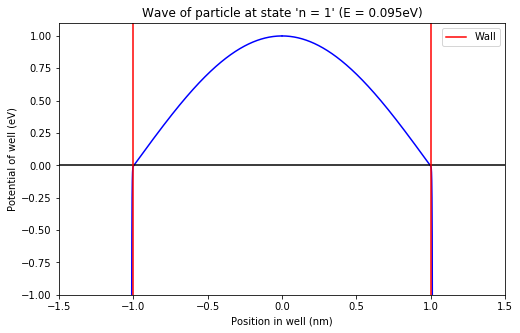

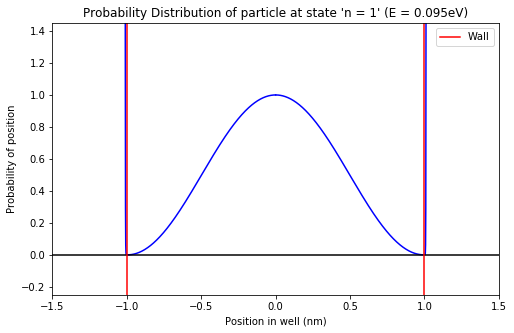

In [5]:
## Define the amount of steps taking
##  Set the energy state of the particle
##   Here, '1' is the 'GROUND STATE', or, the first EVEN state
n = 1000
state = 1

## Messing around with E, I found an energy of 0.095eV worked best
E = 0.095

## This is the potential outside the walls
##  Set to large number to represent infinite potential
V = 10000

x, phi = RungeKutta_fourth(start=0, end=1.5, steps=n, E=E, V=V, state=state)

WellPlot(x, phi, state=state, E=E)

The energy that I found works best is '**0.095 eV**'.

-----------------

## Task 2
Since I have all my functions defined, all I required was a change in '**E**' or my energy.

I'll begin by finding the first 'ODD' state, or 'n=2'.

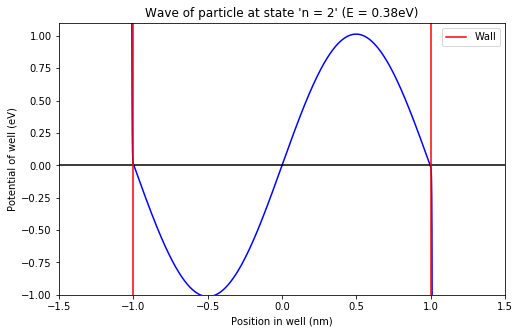

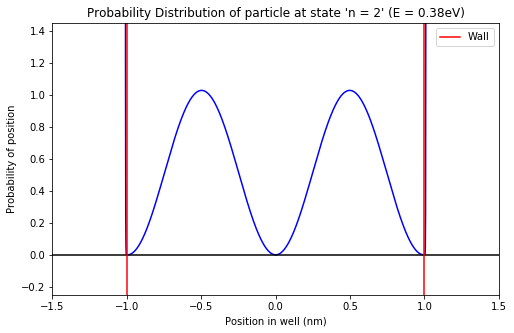

In [6]:
## Define the amount of steps taking
##  Set the energy state of the particle
##   Here, '2' is the first ODD state
n = 1000
state = 2

## Messing around with E, I found an energy of 0.38eV worked best
E = 0.38

## This is the potential outside the walls
V = 10000

x, phi = RungeKutta_fourth(start=0, end=1.5, steps=n, E=E, V=V, state=state)

WellPlot(x, phi, state=state, E=E)

When messing around with the number for 'E', I found that the energy was **~4** times greater than the 'n=1' state.

Using this fact, I decided to check how well my plots scaled if I increased 'E' by the 'n' state **squared**, ie.

$ E \propto n^2 $

This did require further alteration to my 'Runge-Kutta' formula, as the initial slope of the 'ODD' would now need to change with relation to the state.

I have discussed this in the comments in the aforementioned function.

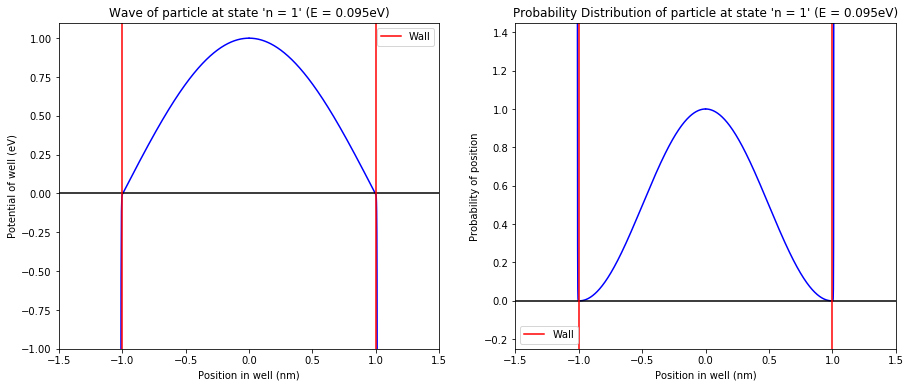

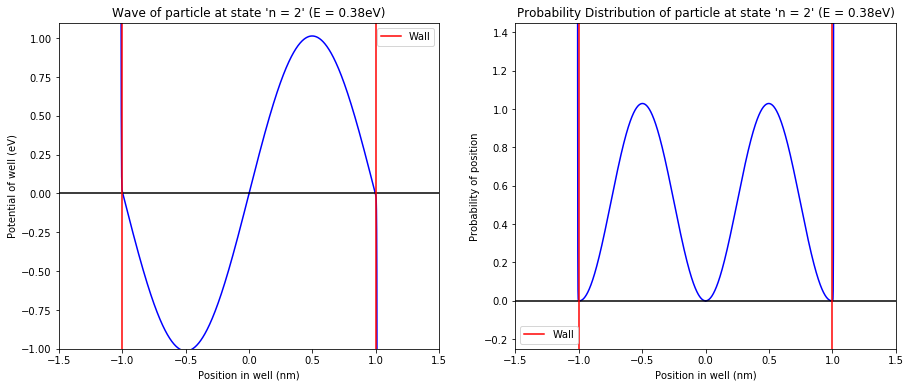

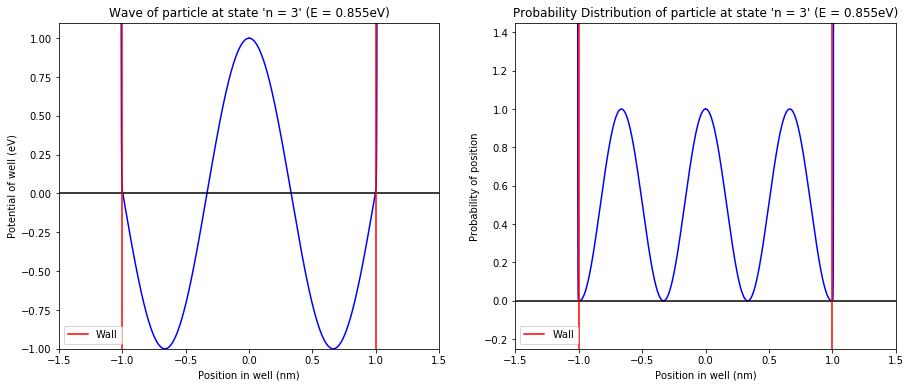

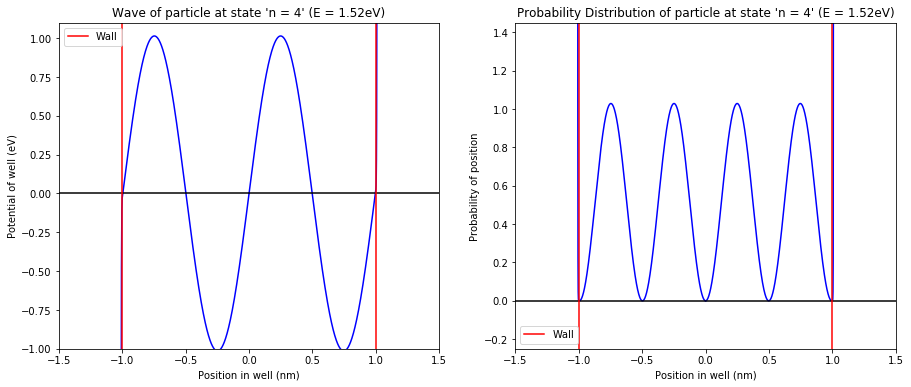

In [7]:
## Define the amount of steps taken
##  Define potential outside of walls
n = 1000
V = 10000

## Begin 'for' loop to calculate the first 4 states
for i in range(1,5):
    ## Using my assumption that energy scales with n^2
    E = 0.095 * i**2   

    x, phi = RungeKutta_fourth(start=0, end=1.5, steps=n, E=E, V=V, state=i)

    WellSubPlot(x, phi, state=i, E=E)

It is clear that the energy of the particle is definitely proportional to the state of the particle

This further cements my statement earlier, that $ E \propto n^2 $